In [10]:
# Question 1: The "Data Leakage" Trap
# One of the most common mistakes in machine learning is Data Leakage—accidentally using information from the test set to scale or transform the training set.

# The Rule: You must fit your scaler/encoder only on the training data, then transform both sets.

# Dataset:
# data1 = {
#     'Age': [22, 25, 47, 52, 46, 56, 55, 60, 62, 63, 18, 20, 21, 23, 24, 80, 85, 90, 88, 82],
#     'Salary': [20000, 22000, 100000, 120000, 110000, 130000, 125000, 140000, 145000, 150000, 15000, 18000, 19000, 21000, 23000, 50000, 55000, 60000, 58000, 52000],
#     'Purchased_VIP': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# }
# df1 = pd.DataFrame(data1)
# Your Tasks:

# Split: Split X (Age, Salary) and y (Purchased_VIP) into training and testing sets (80/20 split, random_state=42).

# Scale Correctly:

# Import StandardScaler from sklearn.preprocessing.

# Fit the scaler on X_train ONLY.

# Transform X_train to create X_train_scaled.

# Transform X_test to create X_test_scaled.

# Train & Evaluate: Train a LogisticRegression model on the scaled training data. Calculate the accuracy on the scaled test data.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


data1 = {
    'Age': [22, 25, 47, 52, 46, 56, 55, 60, 62, 63, 18, 20, 21, 23, 24, 80, 85, 90, 88, 82],
    'Salary': [20000, 22000, 100000, 120000, 110000, 130000, 125000, 140000, 145000, 150000, 15000, 18000, 19000, 21000, 23000, 50000, 55000, 60000, 58000, 52000],
    'Purchased_VIP': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}
df = pd.DataFrame(data1)

x = df[['Age','Salary']]
y = df['Purchased_VIP']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Accuracy Score: ", accuracy_score(y_test,y_pred))


confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
# cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
# cm_display.plot()
# plt.show();

Accuracy Score:  1.0
[[4]]


c:\Users\Sumed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


,Feature_1,Feature_2,Feature_3,Target
0,0.672279,0.327896,99.396040,1
1,0.488078,0.568843,48.209367,1
2,0.825495,0.781970,79.505741,1
3,0.031446,0.721964,83.108399,1
4,0.808050,0.678653,51.774638,1
...,...,...,...,...
195,0.836318,0.730975,87.163624,1
196,0.509646,0.230603,13.523441,1
197,0.460667,0.190943,19.545099,1
198,0.293637,0.099273,51.242192,0


Aggressive Model 1 test data accuracy score =  0.375
Conservative Model 2 test data accuracy score =  0.4
Aggressive Model 1 train data accuracy score =  1.0
Conservative Model 2 train data accuracy score =  0.88125
[[ 5 14]
 [11 10]]


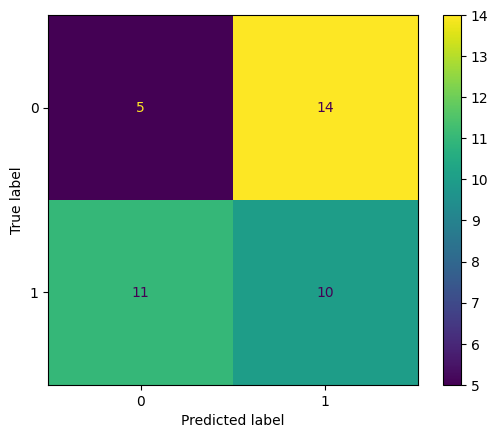

In [11]:
# ## Question 2: Taming XGBoost (Hyperparameters)
# XGBoost is powerful, but it can easily overfit if you let it grow too wild. Let's compare a "default" model vs. a "constrained" model.

# Dataset:

# np.random.seed(99)
# data2 = {
#     'Feature_1': np.random.rand(200),
#     'Feature_2': np.random.rand(200),
#     'Feature_3': np.random.rand(200) * 100,
#     'Target': np.random.randint(0, 2, 200)
# }
# df2 = pd.DataFrame(data2)
# Your Tasks:

# Split: Perform an 80/20 split (random_state=42).

# Model 1 (Aggressive): Train an XGBClassifier with n_estimators=500 and max_depth=10 (this is very deep and detailed for such small data). Fit it on the training set.

# Model 2 (Conservative): Train a second XGBClassifier with n_estimators=50 and max_depth=2.

# Compare: Calculate and print the Training Accuracy and Testing Accuracy for both models.

# Analyze: Which model has a bigger gap between Train and Test accuracy? Which one is overfitting more?



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

np.random.seed(99)
data2 = {
    'Feature_1': np.random.rand(200),
    'Feature_2': np.random.rand(200),
    'Feature_3': np.random.rand(200) * 100,
    'Target': np.random.randint(0, 2, 200)
}
df = pd.DataFrame(data2)
display(df)


X = df[['Feature_1', 'Feature_2', 'Feature_3']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


model_1 = XGBClassifier(n_estimators = 500, max_depth = 10)
model_2 = XGBClassifier(n_estimators = 50, max_depth = 2)


model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)

y_train_pred_1 = model_1.predict(X_train)
y_train_pred_2 = model_2.predict(X_train)

print("Aggressive Model 1 test data accuracy score = ", accuracy_score(y_test,y_pred_1))
print("Conservative Model 2 test data accuracy score = ", accuracy_score(y_test,y_pred_2))

print("Aggressive Model 1 train data accuracy score = ", accuracy_score(y_train,y_train_pred_1))
print("Conservative Model 2 train data accuracy score = ", accuracy_score(y_train,y_train_pred_2))



confusion_matrix = confusion_matrix(y_test,y_pred_1)
print(confusion_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show();

# model 1 test accuracy = 0.375
# model 2 test accuracy = 0.4

# model 1 test accuracy = 1.0
# model 2 test accuracy = 0.88

# since the train accuracy is greater than the test accuracy the aggressive model is overfitting, the same goes with conservative model.

[[2 0]
 [1 1]]


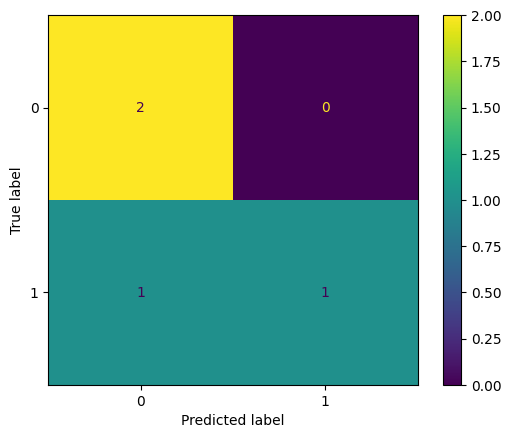

In [10]:
# ## Question 3: The Full Workflow (End-to-End) 🏆
# Let's put it all together. You are predicting if a machine will fail based on sensor data.

# Dataset:

# data3 = {
#     'Temperature': [80, 85, 90, 110, 115, 120, 82, 88, 92, 112, 118, 125, 81, 86, 91, 105, 122, 130, 83, 89],
#     'Vibration':   [10, 12, 11, 40,  42,  45,  11, 13, 12, 41,  44,  48,  10, 12, 11, 38,  46,  50,  11, 13],
#     'Pressure':    [30, 32, 31, 10,  12,  15,  31, 33, 32, 11,  14,  18,  30, 32, 31, 12,  16,  20,  31, 33],
#     'Machine_Fail':[0,  0,  0,  1,   1,   1,   0,  0,  0,  1,   1,   1,   0,  0,  0,  1,   1,   1,   0,  0]
# }
# df3 = pd.DataFrame(data3)
# Your Tasks:

# Split: 80/20 Split (random_state=42).

# Train: Fit an XGBClassifier (default settings are fine) on the training data.

# Evaluate:

# Predict on the Test Set.

# Generate and plot a Confusion Matrix.

# Interpret: Looking at the confusion matrix, did the model miss any failures (False Negatives)? Did it raise any false alarms (False Positives)?


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


data3 = {
    'Temperature': [80, 85, 90, 110, 115, 120, 82, 88, 92, 112, 118, 125, 81, 86, 91, 105, 122, 130, 83, 89],
    'Vibration':   [10, 12, 11, 40,  42,  45,  11, 13, 12, 41,  44,  48,  10, 12, 11, 38,  46,  50,  11, 13],
    'Pressure':    [30, 32, 31, 10,  12,  15,  31, 33, 32, 11,  14,  18,  30, 32, 31, 12,  16,  20,  31, 33],
    'Machine_Fail':[0,  0,  0,  1,   1,   1,   0,  0,  0,  1,   1,   1,   0,  0,  0,  1,   1,   1,   0,  0]
}
df = pd.DataFrame(data3)

X = df[['Temperature', 'Vibration', 'Pressure']]
y = df['Machine_Fail']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)


model = XGBClassifier()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show();

# [[2 0]
#  [1 1]]


# the total test size appears to be 2 + 0 + 1 + 1 which is equal to 4. The true Negative is equal to 2, and true positives is equal to 1, there is 1 false negative and no false positive. 
# to answer the question the model incorrectly predicted 1 of the cases (False Negative). No, the model hasn't raised any alarms.